In [1]:
import numpy as np
from IntBin import ReadI9BinaryFiles
import matplotlib.pyplot as plt
from scipy import optimize
from ParamOpt import Objective2,trans,readdata2,myreduce2

In [18]:
%matplotlib notebook

In [59]:
help(readdata2)

Help on function readdata2 in module ParamOpt:

readdata2(reduceddir, simdir, detN1=0, detN2=0)
    Read the reduced images and the simulated images. Deal with reversed omega index.
    
    Parameters
    -----------
    reduceddir: string
                Directory of reduced experimental images, which are outputs from 'ParallelReduction'.
    simdir:     string
                Directory of simulated images, which are outputs from 'IceNine' simulation mode.
    detN1,detN2:int
                index of detector, usually 0 or 1 or 2 or 3. detN1 is for the reduceddir, detN2 is for the simdir
    
    Returns
    ----------
    mysimdata:  dictionary
                Keys are the frame indices, values are tuple of pixel positions and frame index. The pixels positions are
                saved as n*m ndarry where n is the number of pixels, first two columns are the x, y coordinates.
    myexpdata:  dictionary
                Keys are the frame indices, values are tuple of pixel positions an

In [69]:
#Read thed experimental images and simulated images
simdata,expdata=readdata2('/home/fyshen13/Reeju/Reduced/','/home/fyshen13/Reeju/Sim/',2,0)

In [8]:
2 not in simdata

True

In [64]:
reload(P)
resim,reexp=P.myreduce2(simdata,expdata)

In [70]:
#Reduce the images for better optimization performance
resim,reexp=P.myreduce2(simdata,expdata)
#Wrap the cost function. Note that you need the parameters which were used for simulation 
def funcWrapper(x):
    return -P.Objective(x[0],x[1],x[2],resim,reexp,micx=0.0023,micy=-0.0149,SimL=5.5,SimJ=1024,SimK=2008)

In [72]:
#Use a gradient based optimizer to find the global optimal
#If you want, you can try several random initial guesses to avoid local optimal
res=optimize.minimize(funcWrapper,[3.2552949, 25.07049785,6.9/0.00148],bounds=[(-30,30),(-20,40),(3800,5500)])
print res

      fun: -0.26832524832618337
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  7.48845430e-06,   2.91433544e-06,   2.05391260e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 8
   status: 0
  success: True
        x: array([   10.71909239,    19.84248398,  4688.48817893])


In [25]:
#In this example, the result from IceNine Parameter Monte Carlo is:
#J=1049.43, K=1993.89, L=6.8019

print 'Initial J=',-20+1031.42, '  Final J=',res.x[0]+1031.42
print 'Initial K=',5+1997.13, '  Final K=',res.x[1]+1997.13
print 'Initial L=',7.5, '  Final L=',res.x[2]*0.00148

Initial J= 1011.42   Final J= 1053.64187707
Initial K= 2002.13   Final K= 1993.5427158
Initial L= 7.5   Final L= 6.81074593216


<IPython.core.display.Javascript object>


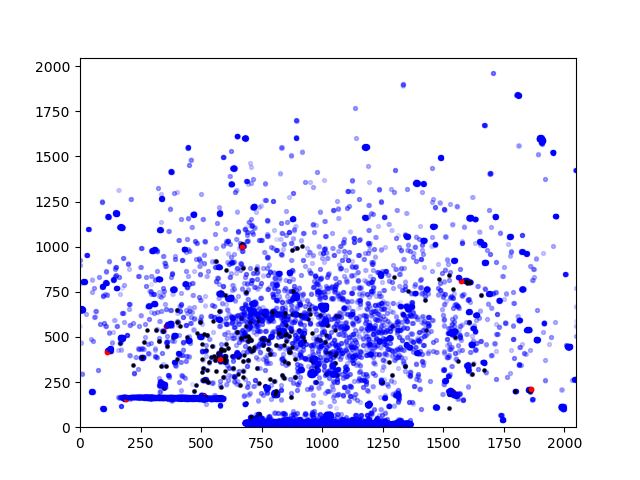

In [74]:
#Plot the results. For clearness, only plot first 50 frames which have simulated peaks.
#Blue peaks are the experiment images, yellow dots are the position of initial guess, red dots are the positions of 
#optimized results.

finalsim=trans(resim,micx=0.0023,micy=-0.0149,SimL=5.5,SimJ=1024,SimK=2008,par={'L':4688.5,'x':10.7,'y':19.84})
initsim=trans(resim,micx=0.0023,micy=-0.0149,SimL=5.5,SimJ=1024,SimK=2008,par={'L':5.5/0.00148,'x':0,'y':0})

for i in initsim.keys()[:10]:
    if i in expdata:
        plt.scatter(2048-expdata[i][0][:,0],2048-expdata[i][0][:,1],c='b',s=8,alpha=0.1)
        plt.scatter(2048-reexp[i][0][:,0],2048-reexp[i][0][:,1],c='black',s=4,alpha=1)
    plt.scatter(2048-finalsim[i][0][:,0],2048-finalsim[i][0][:,1],c='r',s=10)
#    plt.scatter(2048-initsim[i][0][:,0],2048-initsim[i][0][:,1],c='y',s=10)
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()